In [2]:
"""
Massimo Prags AE1
LDSCI4210 Intermediate Programming with Data 2023/24
DATAset link :
https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset

Objective:
"To achieve this, you will analyse the frequency of words and sentiment scores of the
song lyrics. Additionally, you are expected to suggest new automatically generated
song lyrics.

The application should allow users to specify the names of two artists (or
bands), and it will analyse the frequency of words and sentiment scores for each
artist, produce visualisations of the results, and generate new song lyrics for the
specified artists. 

If a specific artist is not available in the dataset, the application should
inform the user accordingly."
1

"""

'\nMassimo Prags AE1\nLDSCI4210 Intermediate Programming with Data 2023/24\nDATAset link :\nhttps://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset\n\nObjective:\n"To achieve this, you will analyse the frequency of words and sentiment scores of the\nsong lyrics. Additionally, you are expected to suggest new automatically generated\nsong lyrics.\n\nThe application should allow users to specify the names of two artists (or\nbands), and it will analyse the frequency of words and sentiment scores for each\nartist, produce visualisations of the results, and generate new song lyrics for the\nspecified artists. \n\nIf a specific artist is not available in the dataset, the application should\ninform the user accordingly."\n1\n\n'

In [3]:
import pandas as pd# load the data into a pandas dataframe 
import re #regular expressions to help manipulate lyrics
from textblob import TextBlob #sentiment
import matplotlib.pyplot as plt #plots
import seaborn as sns 
from pathlib import Path  # Import one object from a library
import imageio     
import wordcloud as wc    # import with aliasing
import random

1. Loading and pre-processing text (10 points)
Load and preprocess the text data, converting it to i) lowercase, ii) removing special
characters, iii) digits, and iv) redundant whitespace, v) list of words and vi) excluding
meaningless words.

In [33]:
allSongs = pd.read_csv("spotify_millsongdata.csv") #load csv into data frame
#create a function to clean text, then use the .apply() function to edit each item in text column
#def processText(lyrics):
"""    
Name:process Text
Parameters: lyrics
Returns: will return the lyrics lowercase
"""
#make a function that will put all the rows with the vector things
#make another function that removes words and makes a list at the same time
#after add this to a new column, again *list_col, will have all words as list with words removed

allSongs["text"] = allSongs["text"].str.lower()#make lower case
allSongs["text"] = allSongs["text"].str.replace('\r\n', ' ',regex = False)
allSongs["text"] = allSongs["text"].str.replace('  ', ' ',regex = True)
allSongs["text"] = allSongs["text"].str.replace(r'[^\w\s]', '', regex = True)

MEANINGLESS = ["i","ill", "a", "at","an", "and", "the", "on", "of", "in", "with", "you",
             "me", "to", "at", "for","if","it","my","that","your","its","be"]

def removeMeaningless(lyrics):
    """
    Function: removeMeaningless
    Parameters: lyrics
    Return: returns lyrics with MEANINGLESS words removed and all words seperated in a list
    """
    wordlist = lyrics.split()
    meaningfulList = [word for word in wordlist if word not in MEANINGLESS]
    return meaningfulList

allSongs["New_text"] = allSongs["text"].apply(removeMeaningless)

allSongs


,artist,song,link,text,New_text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face its a wonderful face and it ...,"[look, her, face, wonderful, face, means, some..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently l...,"[take, easy, please, touch, gently, like, summ..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,ill never know why i had to go why i had to p...,"[never, know, why, had, go, why, had, put, up,..."
3,ABBA,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...,"[making, somebody, happy, is, question, give, ..."
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,"[making, somebody, happy, is, question, give, ..."
...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let...,"[irie, days, come, play, let, angels, fly, let..."
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the...,"[power, workers, more, power, power, workers, ..."
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something ill believe flashl...,"[all, need, is, something, believe, flashlight..."
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go...,"[northern, star, am, frightened, where, can, g..."


2. Analysing text (20 points)
Analyse the processed song lyrics of each specified artist by i) counting the
frequency of words, ii) determining the vocabulary richness, iii) scoring the sentiment
of song lyrics, and iv) identifying any common words between artists.

In [39]:
#for values in dictionary, histogram function for chosen artist
#name artist_sp
#param: artist, file
#return frequency, richness, sentiment

#make other function for common words

def artist_specified_freq(artist):
    """
    Function: artist_specified_freq
    Parameters: artist
    Return:Returns a dictionary with each unique word from all lyrics from one artist as keys and its frequency as its vlaue
    """
    artistSongs = allSongs[allSongs["artist"] == artist]
    wordFreq = {}
    for song in artistSongs["New_text"]:
        for word in song:
            if word not in wordFreq.keys():
                wordFreq[word] = 1
            else:
                wordFreq[word] = wordFreq[word]+1
    return wordFreq#works

def artist_specified_rich(artist):
    """
    Function: artist_specified_rich
    Parameters: artist
    Return:Returns a single value for an artist which is the number of unique words divided by number of all words in all wongs
    """
    #richnessformula = #ofUniqueWords / #ofWords 
    artistSongs = allSongs[allSongs["artist"] == artist]
    allwordCount = 0
    allWordCount = sum(len(word_list) for word_list in artistSongs["New_text"]) #using new text so pool of words are meaningfull
    artistFreq = artist_specified_freq(artist)  
    uniqueWordCount = len(artistFreq)
    rich = uniqueWordCount / allWordCount
    return rich
    
def avg_artist_sentiment(artist):
    """
    Function: artist_specified_rich
    Parameters: artist
    Return:Returns a single value of the average sentiment of all songs by the artist
    """
    artistSongs = allSongs[allSongs["artist"] == artist]
    sets = []
    for song in artistSongs["text"]:
        st = TextBlob(song).sentiment.polarity
        sets.append(st)
    return sum(sets)/len(sets)
def check_artist_relation(artist1, artist2):
    """
    Funcction:check_artist_relation
    Parameter: artist1 and artist 2
    Returns: a list of uinique words used between both artist meaning each simular word appears once. 
    """
    words1 = [word for lyric in allSongs[allSongs["artist"] == artist1]["New_text"]for word in lyric]
    words2 = [word for lyric in allSongs[allSongs["artist"] == artist2]["New_text"]for word in lyric]
    simular_w = [word for word in words1 if word in words2]
    unique_sim = []
    for words in simular_w:
        if words not in unique_sim:
            unique_sim.append(words)
    return unique_sim

print(artist_specified_freq("ABBA"))#test
print(artist_specified_rich("ABBA"))#test
print(avg_artist_sentiment("ABBA"))#test
print(check_artist_relation("ABBA", "Aerosmith"))

{'look': 47, 'her': 38, 'face': 26, 'wonderful': 3, 'means': 8, 'something': 23, 'special': 11, 'way': 75, 'she': 73, 'smiles': 2, 'when': 150, 'sees': 2, 'how': 72, 'lucky': 2, 'can': 159, 'one': 115, 'fellow': 5, 'shes': 24, 'just': 108, 'kind': 20, 'girl': 64, 'makes': 14, 'feel': 80, 'fine': 14, 'who': 45, 'could': 85, 'ever': 33, 'believe': 32, 'mine': 7, 'without': 21, 'im': 228, 'blue': 27, 'leaves': 7, 'what': 115, 'do': 129, 'we': 201, 'go': 100, 'walk': 12, 'park': 8, 'holds': 1, 'squeezes': 1, 'hand': 24, 'well': 56, 'walking': 11, 'hours': 3, 'talking': 4, 'about': 35, 'all': 203, 'things': 21, 'plan': 2, 'take': 92, 'easy': 21, 'please': 35, 'touch': 7, 'gently': 2, 'like': 153, 'summer': 27, 'evening': 6, 'breeze': 6, 'time': 81, 'make': 77, 'slow': 6, 'andante': 20, 'let': 82, 'feeling': 47, 'grow': 9, 'fingers': 10, 'soft': 3, 'light': 26, 'body': 2, 'velvet': 1, 'night': 59, 'soul': 24, 'know': 144, 'slowly': 4, 'now': 138, 'music': 32, 'am': 73, 'song': 31, 'play': 38

3. Visualising text (20 points)
Visualise the analysed data by i) generating word clouds for each artist, ii) plotting
sentiment scores in a scatter plot, and iii) creating a heat map to show word overlap
between artists

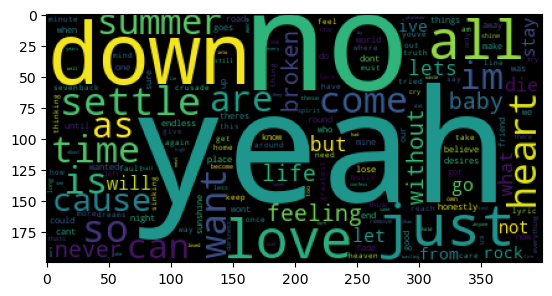

In [6]:
def cloud(frequency):
    """
    Function: cloud
    Parameters: frequency which must be a dictionary
    Return: a word cloud with more frequent words larger
    """
    cloud = wc.WordCloud().generate_from_frequencies(frequency)#config. cloud
    plt.imshow(cloud)

cloud(artist_specified_freq("Zwan"))#test

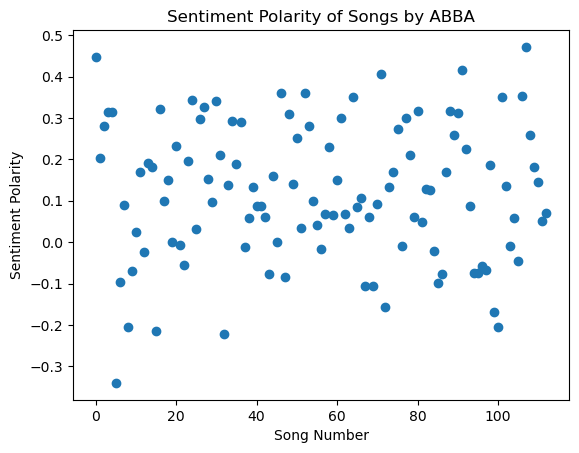

In [7]:
#x is artist songs, y is sentiment scores
def sentiment_scatterPLOT(artist):
    """
    Function: sentiment_scatterPLOT
    Parameters: artist
    Return: returns a scatter plot of the sentiment of every song by artist
    """
    artistSongs = allSongs[allSongs["artist"] == artist]
    sets = []
    for song in artistSongs["text"]:
        st = TextBlob(song).sentiment.polarity
        sets.append(st)

    plt.scatter(range(len(artistSongs)),sets)
    plt.title(f'Sentiment Polarity of Songs by {artist}')
    plt.xlabel('Song Number')
    plt.ylabel('Sentiment Polarity')
    plt.show()

sentiment_scatterPLOT("ABBA")#test

4. Generating text (20 points)
Implement a text generator that allows the user to specify the number of n-grams
and generate two new songs based on the lyrics of the specified artists

In [31]:
def generate_lyric(allSongs, artist):
    ''' Function: generate_lyric
        Parameters: allSongs, artist
        Returns: one ngram using words from all songs
    '''
    artistSongs = allSongs[allSongs["artist"] == artist]
    begin = [word[0] for word in artistSongs["New_text"] if word]
    ending = [word[-1] for word in artistSongs["New_text"] if word]
    
    ngr = {}
    for wrd in artistSongs["New_text"]:
        for i in range(len(wrd)-1):
            if wrd[i] not in ngr.keys():
                ngr[wrd[i]] = []    
            ngr[wrd[i]].append(wrd[i+1])
    
    sentence = ""
    curr_word = random.choice(begin)
    while True:
        sentence += " " + curr_word
        if curr_word in ending:
            break
        curr_word = random.choice(ngr[curr_word])
    
    return sentence
def pGrams(allSongs,artist,ngrams):
    """
    Function:pGrams
    Parameters: allSongs,artist,ngrams
    Return:prints ngrams with amount and artist specified by parameters
    """
    for _ in range(ngrams):
        print(generate_lyric(allSongs, artist))
pGrams(allSongs,"ABBA",10)#test

 just smiled took her way
 spring air was not mans world
 no more
 say thank music still recall our hearts while music yeah
 have
 went see man
 have
 sometimes when pretty scarce used pass by then find
 can go
 youre gone


Tell me an artist name you would like to know about ABBA
Would you like to know word frequency , sentiment , richness, or generate sentiment
The artist average sentiment among all songs is:  0.11965960035218116


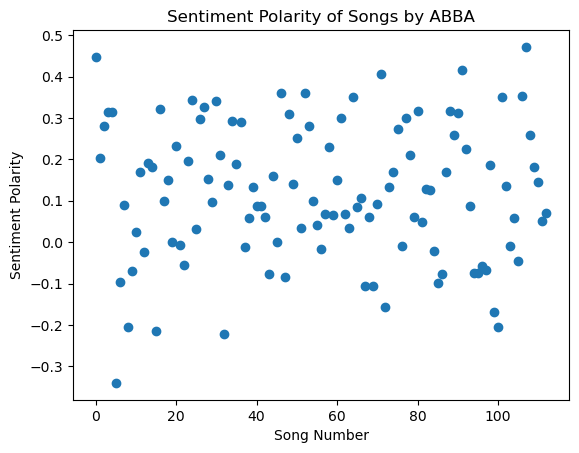

None
Tell me two artist name you would like to know about ABBA,Aerosmith
These are all the words in common 
 ['look', 'her', 'face', 'means', 'something', 'special', 'way', 'she', 'when', 'sees', 'how', 'lucky', 'can', 'one', 'shes', 'just', 'kind', 'girl', 'makes', 'feel', 'fine', 'who', 'could', 'ever', 'believe', 'mine', 'without', 'im', 'blue', 'leaves', 'what', 'do', 'we', 'go', 'walk', 'park', 'hand', 'well', 'walking', 'talking', 'about', 'all', 'things', 'plan', 'take', 'easy', 'please', 'touch', 'like', 'summer', 'evening', 'breeze', 'time', 'make', 'slow', 'let', 'feeling', 'grow', 'fingers', 'soft', 'light', 'body', 'velvet', 'night', 'soul', 'know', 'slowly', 'now', 'music', 'am', 'song', 'play', 'again', 'strong', 'cause', 'youre', 'making', 'sing', 'sound', 'ground', 'oh', 'dont', 'down', 'theres', 'eyes', 'thousand', 'butterflies', 'talk', 'away', 'never', 'why', 'had', 'put', 'up', 'such', 'rotten', 'show', 'boy', 'was', 'tough', 'stuff', 'saying', 'need', 'anymore', 'i

In [52]:
#user interface
artist = input("Tell me an artist name you would like to know about ")
if artist in allSongs['artist'].values:
    decision = input("Would you like to know word frequency , sentiment , richness, or generate ")
    if decision == "frequency":
        print(artist_specified_freq(artist))
        cloud(artist_specified_freq(artist))
    elif decision == "sentiment":
        print("The artist average sentiment among all songs is: ", avg_artist_sentiment(artist))
        print(sentiment_scatterPLOT(artist))
    elif decision == "richness":
        print("The richness of the artist vocabulary is: ", artist_specified_rich(artist))
    elif decision == "generate":
        ngrams = int(input("How many ngrams would you like to print as an int"))
        pGrams(allSongs,artist,ngrams)
artist, artist1 = input("Tell me two artist name you would like to know about ").split(",")
print("These are all the words in common: \n", check_artist_relation(artist, artist1))
    

5. Reflecting on the process (20 points)
Write a reflection on your experience working on this project. Discuss the challenges
you encountered during the development of the application, the solutions you
implemented, and the lessons you learned from the project. Reflect on the
effectiveness of the techniques used and propose potential improvements for future
iterations.

I thought that this project was very challenging. The most difficult parts for me was part to and creating the functions to make bi grams in part 4. Starting with step one, some of the challenges I had was deciding how to use vectorized oporations and which oporations should be in a function or not. I processsed the lyrics using the vectorized oporations to make everything lower, remove any letters or characters and double whitespace and \r\n which was repeated multple times throught the text. Then I made a function to remove all meaningless words which first seperated every song into a list of words then removed the specified words. I made a new column called New_text with these values because this was basically my completly processed data. For part 2 I seperated frequency, richness, sentiment and simular word into its own function, I was able to make the parameters for each as only the artist names. The artist_specified_freq(artist) was more chalanging as I had trouble putting together the for loop that would go though evey word. For richnesss and sentiment, my function output a single number. For sentiment I utilized the TextBlob library and used polarity which tells you if somthing is negative with a number less than zero or positive if the output is grater than zero. I did this becaue I feel like we judge songs as either happy(positive) or sad(negative). (compare songs)/. For part 3 it was very straight forwar. For the text blob I was able to make the frequencies per artist the parameter so you would call the artist_specified_freq(artist) function. The words in the textblob came up larger the more frequent they were in all the songs. The scater plot also took a single artist and ploted the sentiment scored for each song. With the song number on the x axis and the respective sentiment score on the y. For part 4 I made a generate_lyric(allSongs, artist) function. This just out put an ngram. I then used another function to specity how many times you wanted the ngram to print and a new ngram would print on every line. I had trouble because it kept printing the same ngram over and over. I also had trouble getting it to make exact bigrams every time. Over all I learned alot about data frames, pandas, TextBlob, manipulating data frames and many other things. 